# Implementation of Ant Colony Optimisation (ACO) Algorithm

The code in this notebook assumes that you have the functions to read a TSP file in a file called readTSP.py and returns the content as a dictionary

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from readTSP import *

In [3]:
def initializeAnts(cities, colony):
    return np.random.randint(cities.shape[0], size = colony)

In [4]:
def inverseDistances(cities):
    # A 2-dimensional array of zeros
    distances = np.zeros((cities.shape[0], cities.shape[0]))

    # Calculate distance between nodes
    for index, point in enumerate(cities):
        distances[index] = np.sqrt(((cities - point) ** 2).sum(axis = 1))

    with np.errstate(all = 'ignore'):    # Floating-point error handling - Setted to known state
        inv_distances = 1 / distances    # invert distances
    inv_distances[inv_distances == np.inf] = 0    # Replace infinity by zero to prevent zero division error

    return inv_distances

In [5]:
def moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau):
    
    paths = np.zeros((cities.shape[0], positions.shape[0]), dtype = int) - 1

    # Initial position at node zero
    paths[0] = positions

    # For nodes after start to end
    for node in range(1, cities.shape[0]):
        # For each ant
        for ant in range(positions.shape[0]):
            # Probability to travel the nodes
            next_location_probability = (inv_distances[positions[ant]] ** alpha + pheromones[positions[ant]] ** beta /
                                            inv_distances[positions[ant]].sum() ** alpha + pheromones[positions[ant]].sum() ** beta)

            # Index to maximum probability node
            next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Check if node has already been visited
            while next_position in paths[:, ant]:
                # Replace the probability of visited to zero
                next_location_probability[next_position] = 0.0

                # Find the maximum probability node
                next_position = np.argwhere(next_location_probability == np.amax(next_location_probability))[0][0]

            # Add node to path
            paths[node, ant] = next_position

            # Update pheromones (releasing pheromones)
            pheromones[node, next_position] = pheromones[node, next_position] + del_tau

    # Paths taken by the ants
    return np.swapaxes(paths, 0, 1)

In [6]:
def runAcoTsp(cities, iterations = 80, colony = 50, alpha = 1.0, beta = 1.0, del_tau = 1.0, rho = 0.5):
    
    inv_distances = inverseDistances(cities)
    inv_distances = inv_distances ** beta    # Add beta algorithm parameter to inverted distances

    # Initialize pheromones to zero, path to nothing
    pheromones = np.zeros((cities.shape[0], cities.shape[0]))
    min_distance = None
    min_path = None

    # For the number of iterations
    for i in range(iterations):
        positions = initializeAnts(cities, colony)    # Randomly place ants
        paths = moveAnts(cities, positions, inv_distances, pheromones, alpha, beta, del_tau)    # Find a path

        pheromones *= (1 - rho)    # Evaporate pheromones

        # [3] For each path
        for path in paths:
            distance = 0
            
            # For each node from second to last
            for node in range(1, path.shape[0]):
                # Calculate distance to the last node
                distance += np.sqrt(((cities[int(path[node])] - cities[int(path[node - 1])]) ** 2).sum())

            # Update minimun distance and path if less nor non existent
            if not min_distance or distance < min_distance:
                min_distance = distance
                min_path = path

    # Copy and append first node to end of minimum path to form closed path
    min_path = np.append(min_path, min_path[0])

    # Return tuple
    return (min_path, min_distance)

## Executing a base ACO for the TSP


Name:  d200-11
Type:  TSP
Comment:  200
Dimension:  200
Edge Weight Type:  EUC_2D 



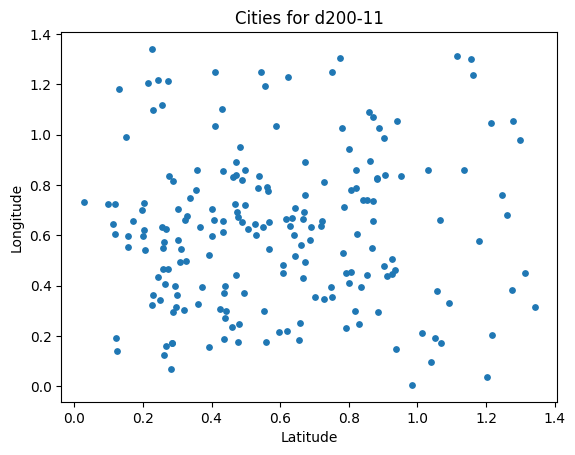

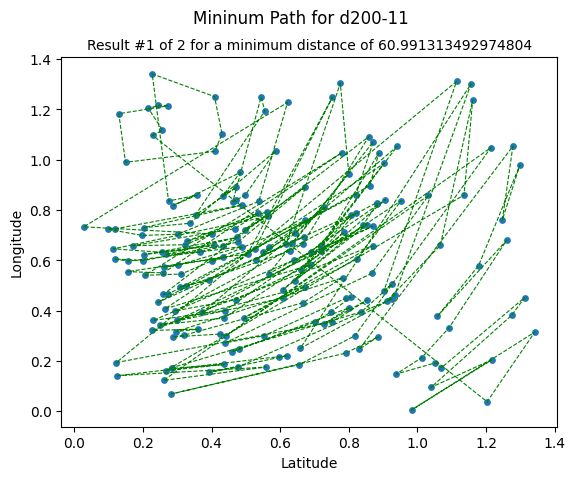

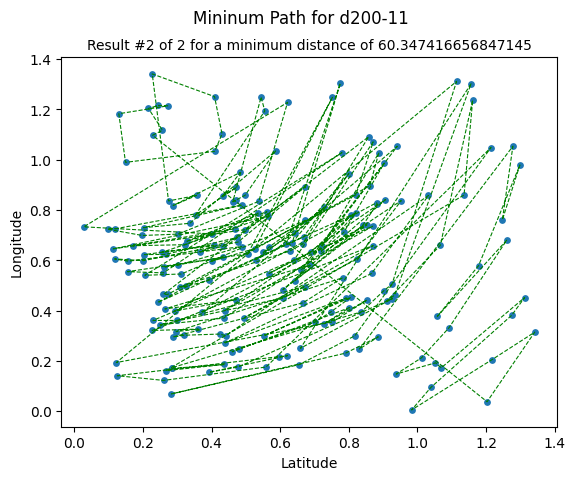

Min Distance Average for the last 2 results is 60.66936507491097


In [7]:
# Read data
TSP = getTspData('d200-11.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])

# Plot
plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# ACO Parameters
iterations = 50
colony = 25
alpha = 1
beta = 1
del_tau = 1.5
rho = 0.5

# Vars
n = 2         # Run ACO this many times
average = 0 

# Repeat
for i in range(n):
    # Execute ACO
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    # Plot solution
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
    plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
# Show Average over n runs
print('Min Distance Average for the last {} results is {}'.format(n, average/n))


## Alpha Variations


Name:  d200-11
Type:  TSP
Comment:  200
Dimension:  200
Edge Weight Type:  EUC_2D 



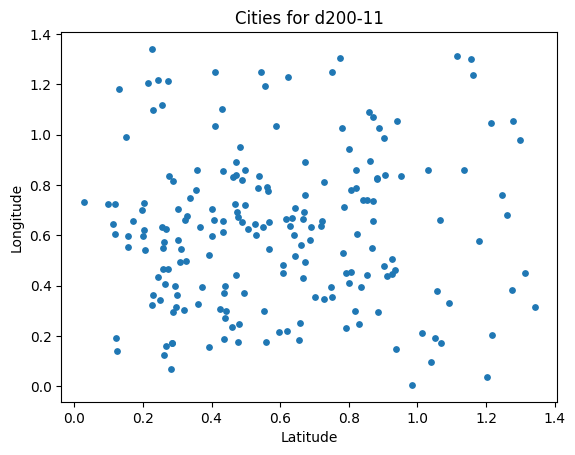

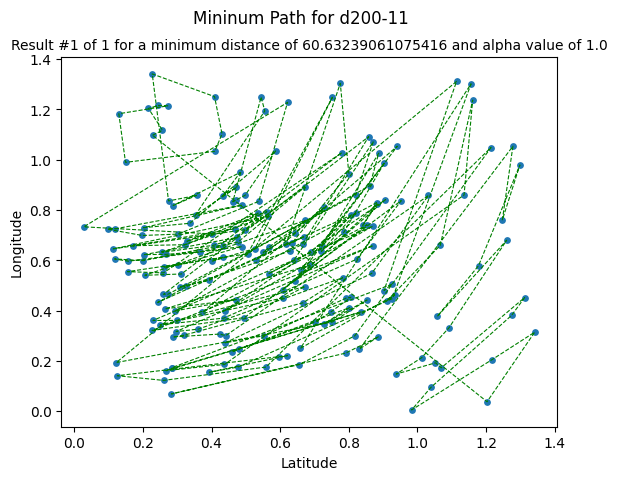

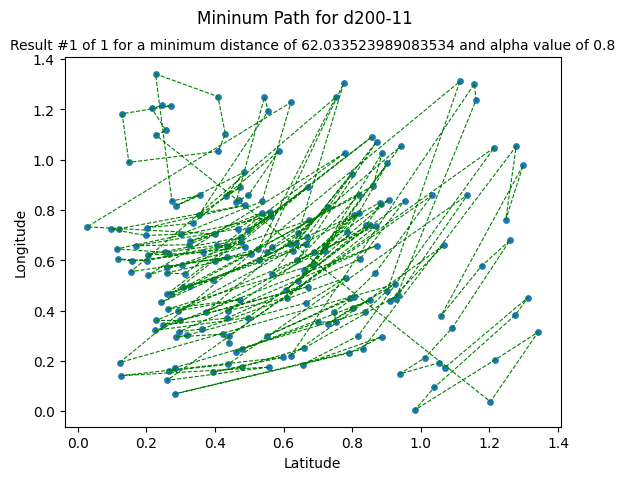

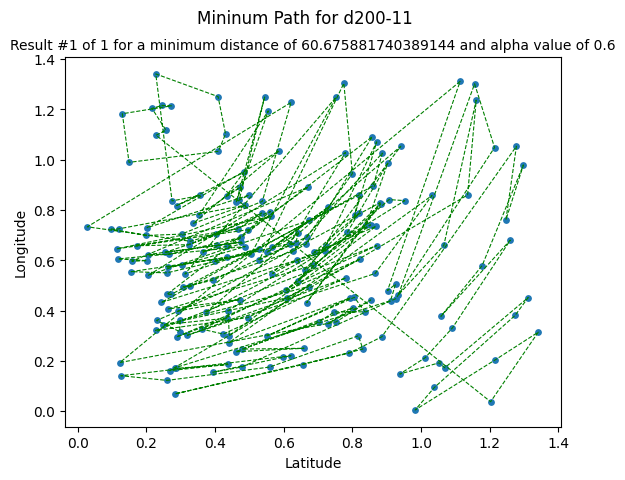

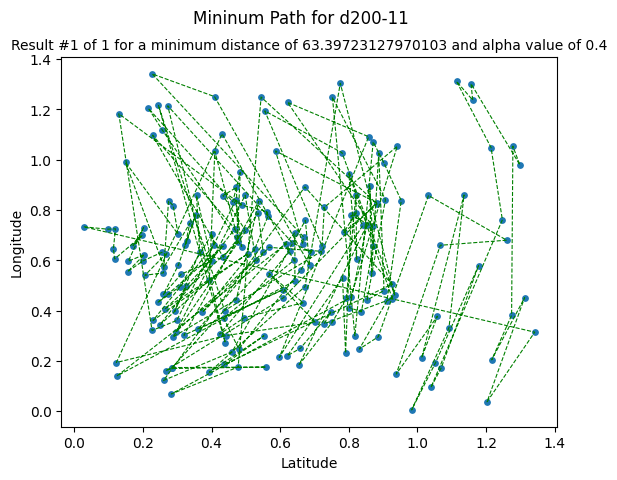

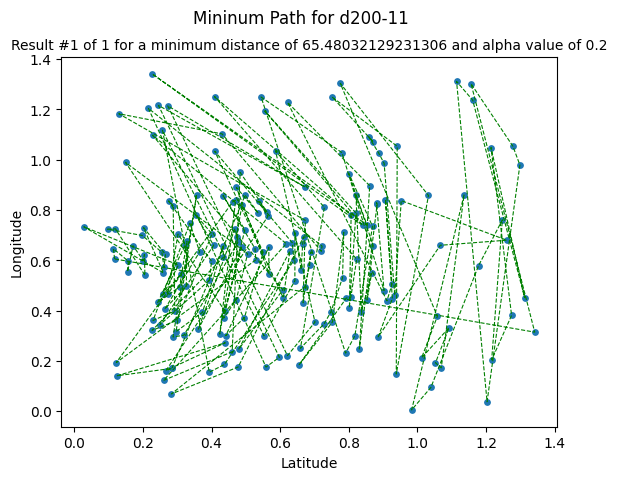

Min Distance Average for the last 5 results is 62.44386978244819


In [11]:
# Read data
TSP = getTspData('d200-11.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])

# Plot
plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# ACO Parameters
iterations = 50
colony = 25
alpha = 1
beta = 1
del_tau = 1.5
rho = 0.5

# Vars
n = 1         # Run ACO this many times
average = 0 

# Repeat
for i in range(n):
    # Vary Alpha values
    alpha_values = [1.0, 0.8, 0.6, 0.4, 0.2]  # Set the alpha values to vary
    for alpha in alpha_values:
        # Execute ACO
        min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
        average += min_distance

        # Plot solution
        plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
        plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
        plt.suptitle('Mininum Path for {}'.format(TSP['name']))
        plt.title('Result #{} of {} for a minimum distance of {} and alpha value of {}'.format(i + 1, n, min_distance, alpha), fontsize = 10)
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')

        plt.show()
        plt.close()

# Show Average over n runs
print('Min Distance Average for the last {} results is {}'.format(n*len(alpha_values), average/(n*len(alpha_values))))

## Tuning Pheromone Evaporation: RHO Variations

Testing with rho = 0.1


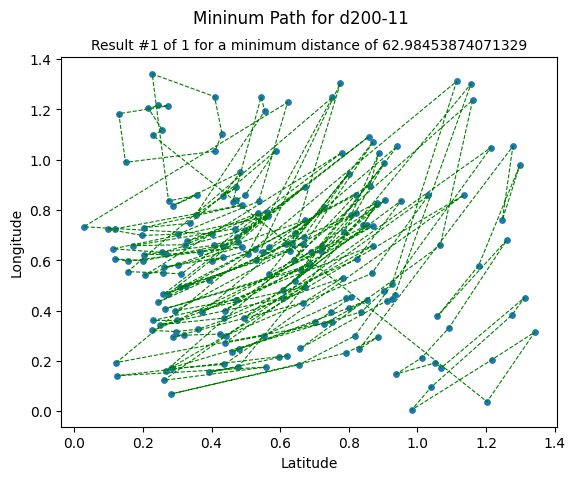

Min Distance Average for the last 1 results is 62.98453874071329

Testing with rho = 0.3


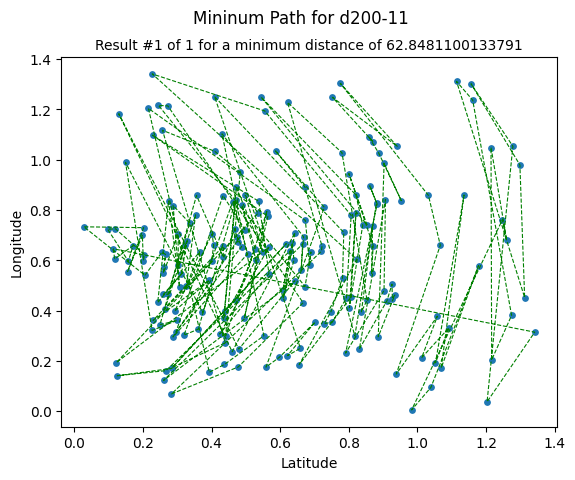

Min Distance Average for the last 1 results is 62.8481100133791

Testing with rho = 0.5


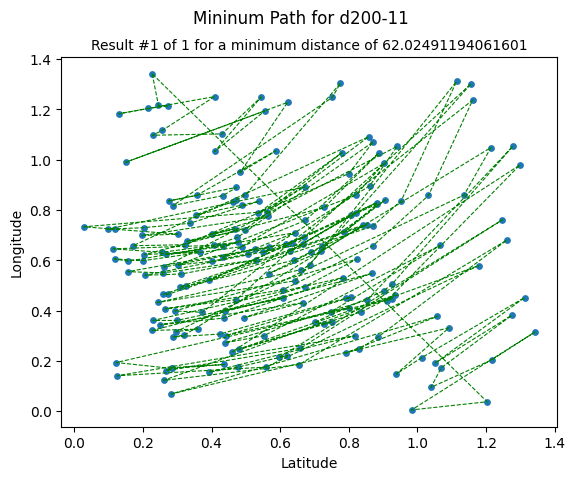

Min Distance Average for the last 1 results is 62.02491194061601

Testing with rho = 0.7


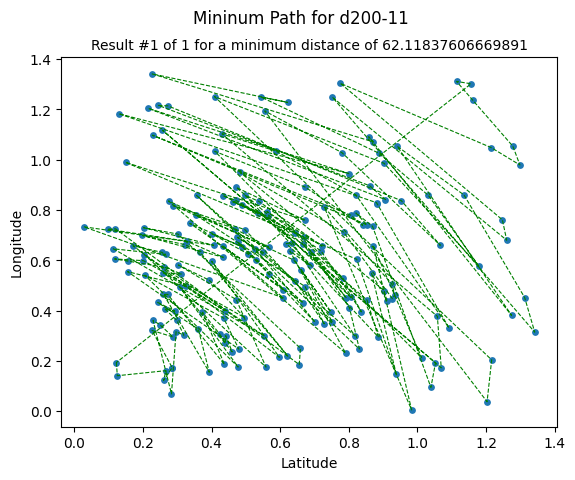

Min Distance Average for the last 1 results is 62.11837606669891

Testing with rho = 0.9


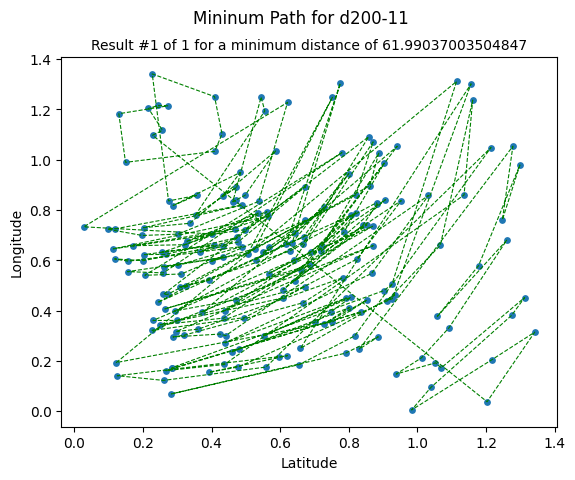

Min Distance Average for the last 1 results is 61.99037003504847



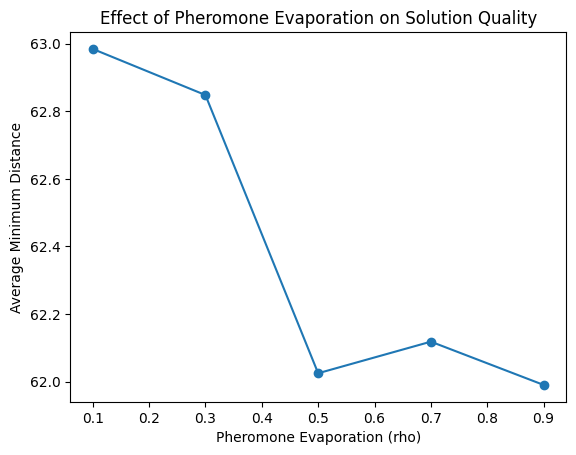

In [14]:
# ACO Parameters
iterations = 25
colony = 25
alpha = 1
beta = 1
rho_values = [0.1, 0.3, 0.5, 0.7, 0.9]
del_tau = 1.5

# Vars
n = 1         # Run ACO this many times
average_distances = []

for rho in rho_values:
    average = 0 
    print('Testing with rho =', rho)
    for i in range(n):
        # Execute ACO
        min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
        average += min_distance

        # Plot solution
        plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
        plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
        plt.suptitle('Mininum Path for {}'.format(TSP['name']))
        plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
        plt.xlabel('Latitude')
        plt.ylabel('Longitude')

        plt.show()
        plt.close()

    average_distances.append(average/n)
    print('Min Distance Average for the last {} results is {}\n'.format(n, average/n))

# Plot results
plt.plot(rho_values, average_distances, marker='o')
plt.title('Effect of Pheromone Evaporation on Solution Quality')
plt.xlabel('Pheromone Evaporation (rho)')
plt.ylabel('Average Minimum Distance')
plt.show()

# Tuning Pheromone Evaporation: RHO and Del_tau variations

By combining variations in the pheromone evaporation rate with the rate in which pheromones are dropped in a "Taguchi method" style, It provides a quick and comprehensive analysis towards finding the optimal parameters regarding pheromone evaporation. I could have combined the alpha variations aswell but decided against this due to clarity in my report and computational power and time needed to run a longer test. Because of this I decided to implement the alpha value that repeatedly presented the best results in the first test cell.

Testing with rho = 0.1 and del_tau = 0.5


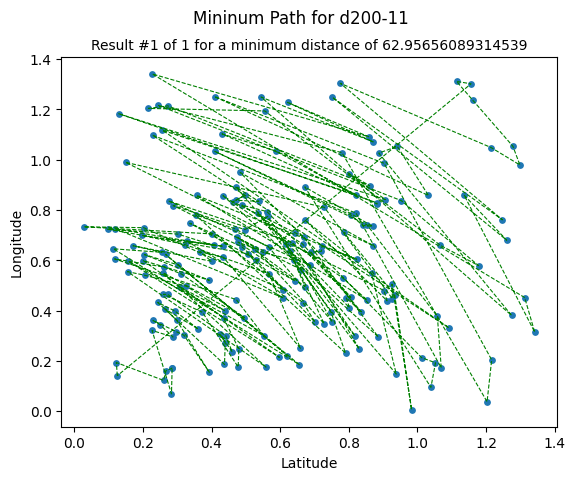

Min Distance Average for the last 1 results is 62.95656089314539

Testing with rho = 0.1 and del_tau = 1.0


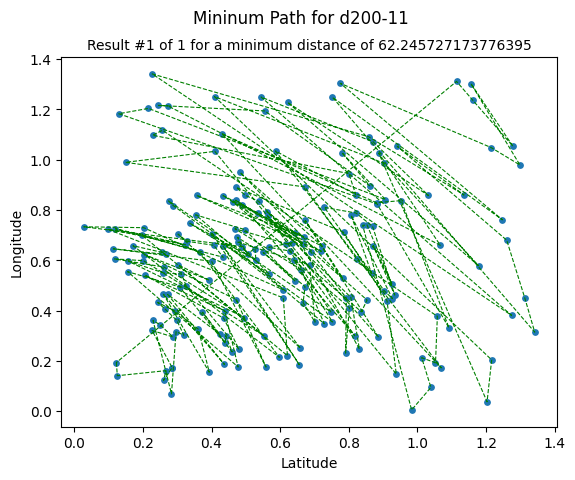

Min Distance Average for the last 1 results is 62.245727173776395

Testing with rho = 0.1 and del_tau = 1.5


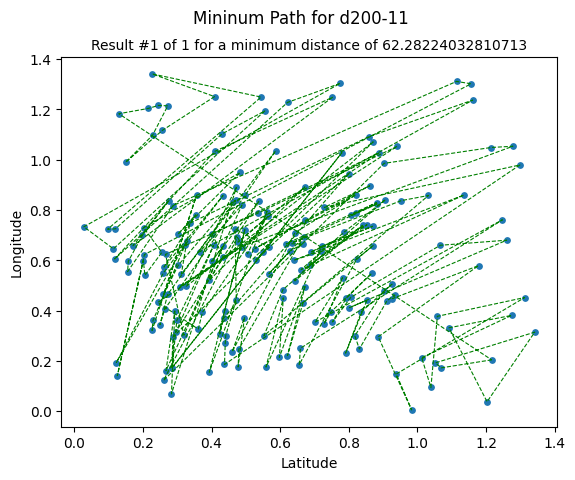

Min Distance Average for the last 1 results is 62.28224032810713

Testing with rho = 0.1 and del_tau = 2.0


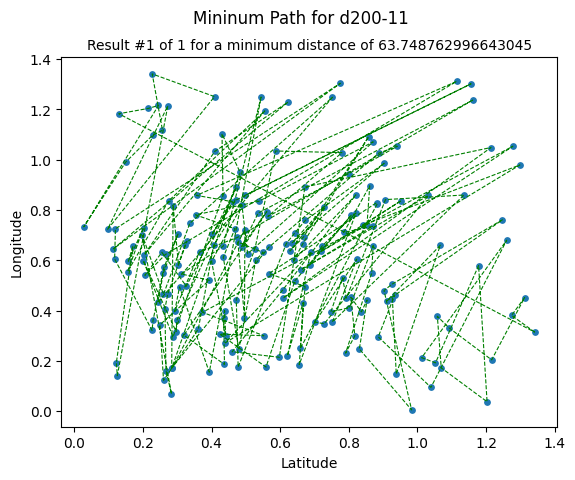

Min Distance Average for the last 1 results is 63.748762996643045

Testing with rho = 0.1 and del_tau = 2.5


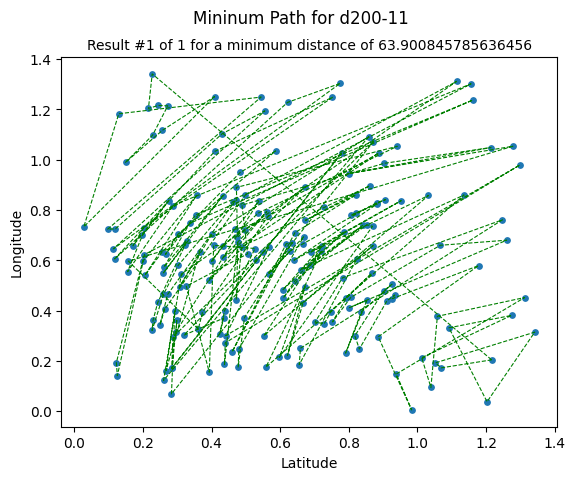

Min Distance Average for the last 1 results is 63.900845785636456

Testing with rho = 0.3 and del_tau = 0.5


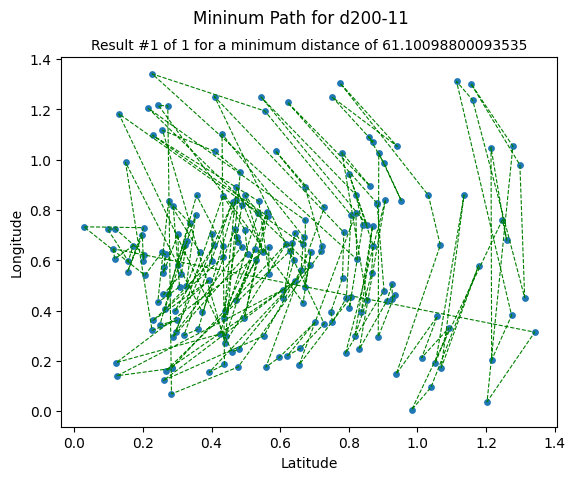

Min Distance Average for the last 1 results is 61.10098800093535

Testing with rho = 0.3 and del_tau = 1.0


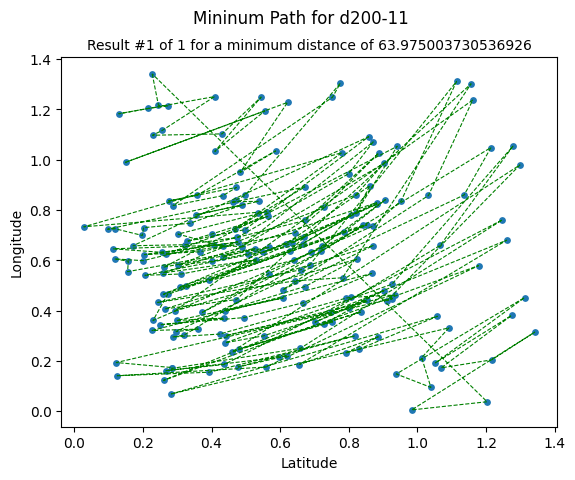

Min Distance Average for the last 1 results is 63.975003730536926

Testing with rho = 0.3 and del_tau = 1.5


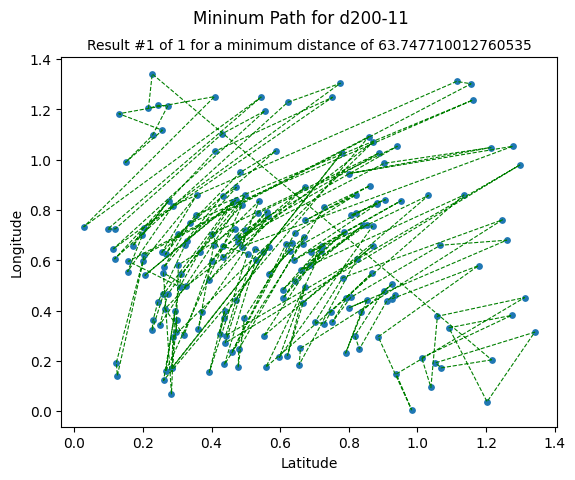

Min Distance Average for the last 1 results is 63.747710012760535

Testing with rho = 0.3 and del_tau = 2.0


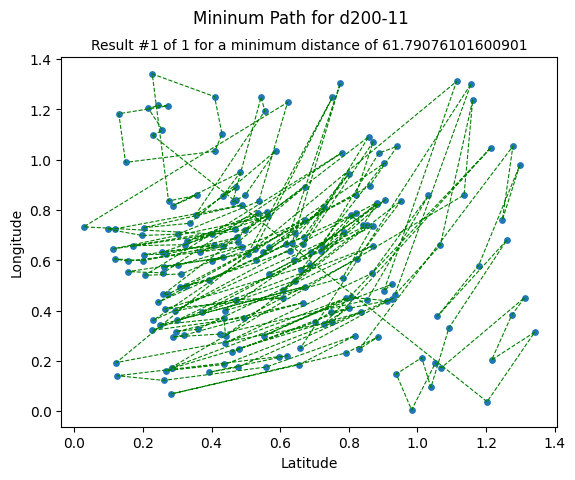

Min Distance Average for the last 1 results is 61.79076101600901

Testing with rho = 0.3 and del_tau = 2.5


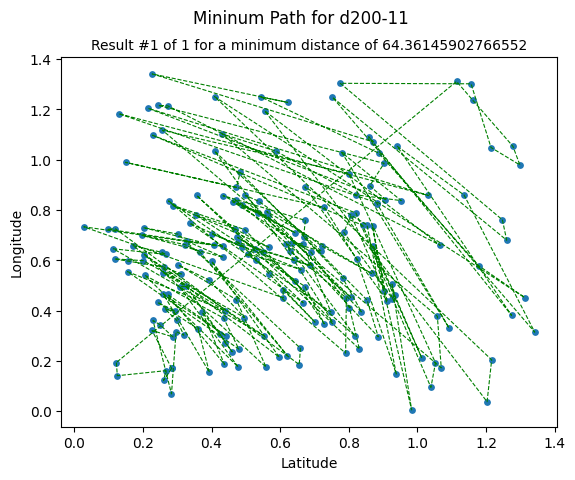

Min Distance Average for the last 1 results is 64.36145902766552

Testing with rho = 0.5 and del_tau = 0.5


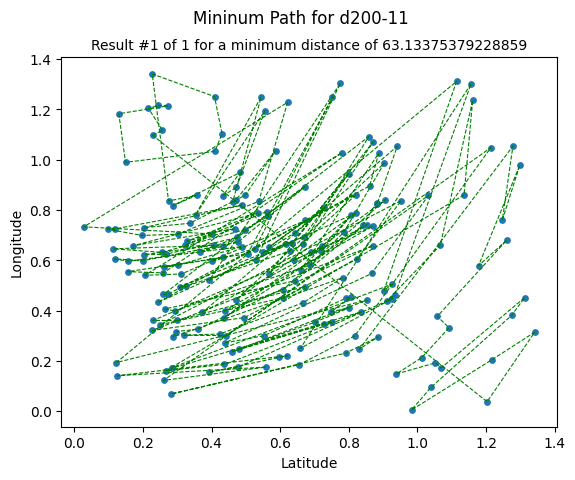

Min Distance Average for the last 1 results is 63.13375379228859

Testing with rho = 0.5 and del_tau = 1.0


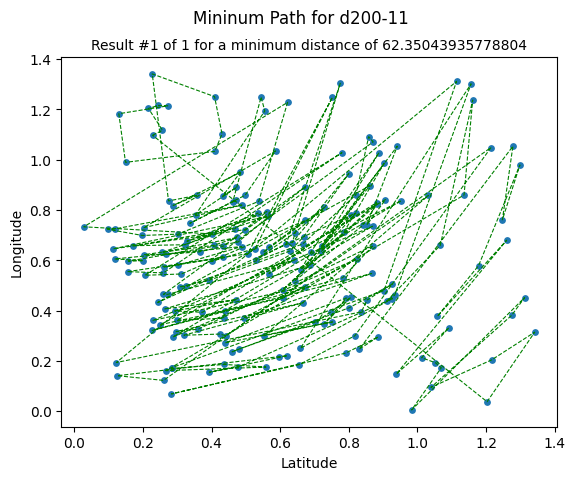

Min Distance Average for the last 1 results is 62.35043935778804

Testing with rho = 0.5 and del_tau = 1.5


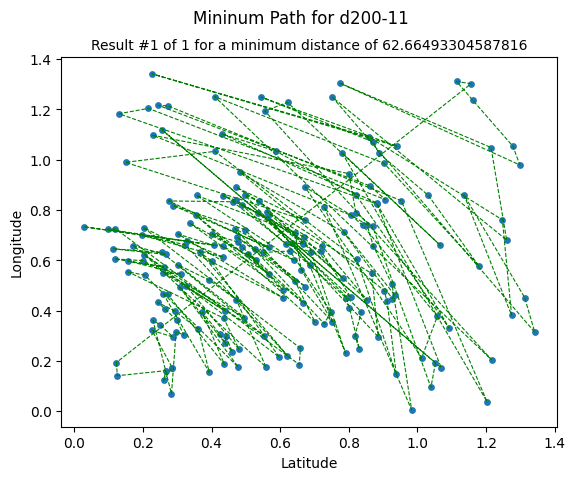

Min Distance Average for the last 1 results is 62.66493304587816

Testing with rho = 0.5 and del_tau = 2.0


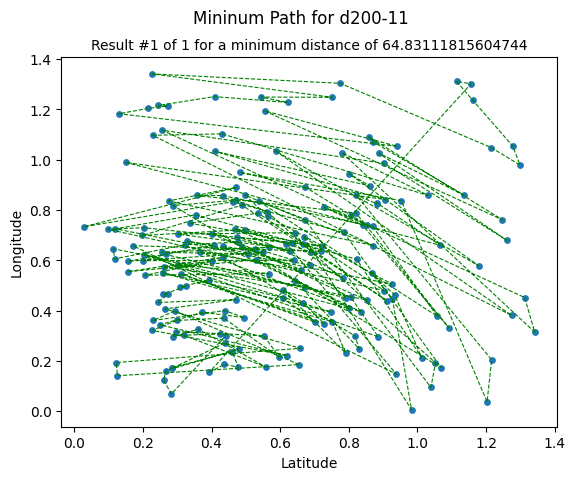

Min Distance Average for the last 1 results is 64.83111815604744

Testing with rho = 0.5 and del_tau = 2.5


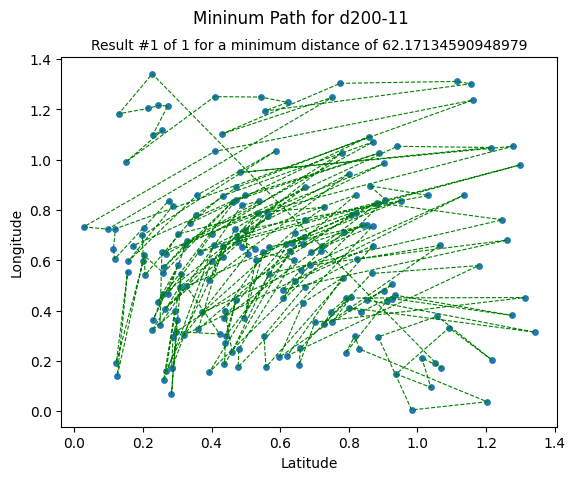

Min Distance Average for the last 1 results is 62.17134590948979

Testing with rho = 0.7 and del_tau = 0.5


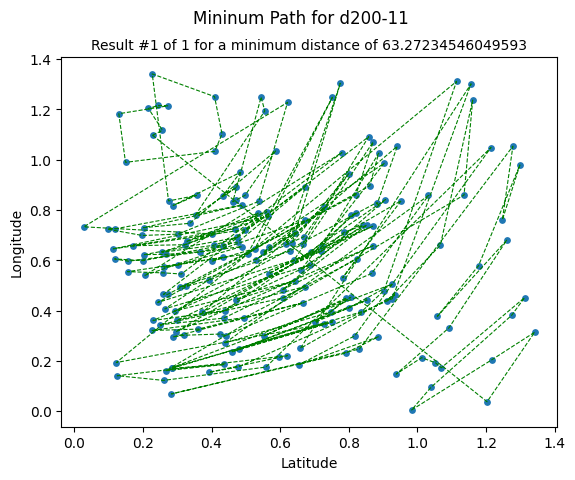

Min Distance Average for the last 1 results is 63.27234546049593

Testing with rho = 0.7 and del_tau = 1.0


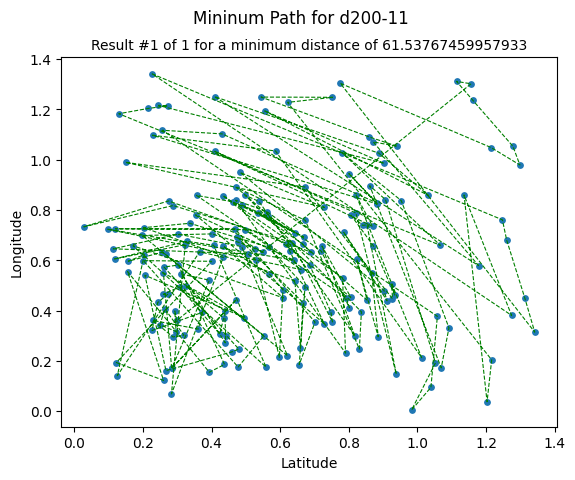

Min Distance Average for the last 1 results is 61.53767459957933

Testing with rho = 0.7 and del_tau = 1.5


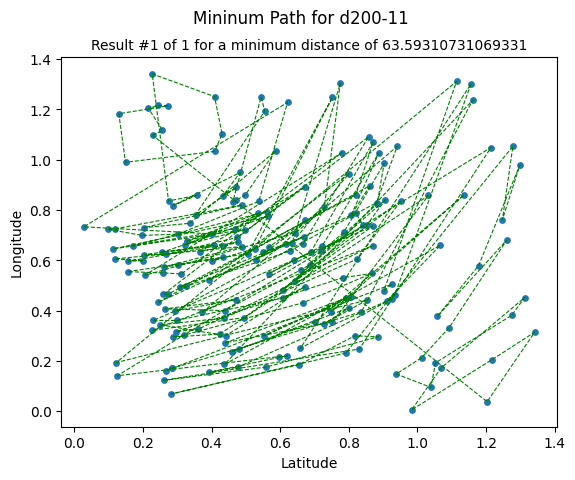

Min Distance Average for the last 1 results is 63.59310731069331

Testing with rho = 0.7 and del_tau = 2.0


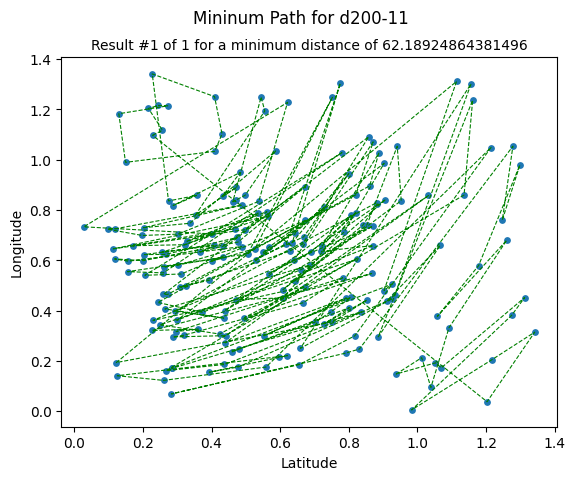

Min Distance Average for the last 1 results is 62.18924864381496

Testing with rho = 0.7 and del_tau = 2.5


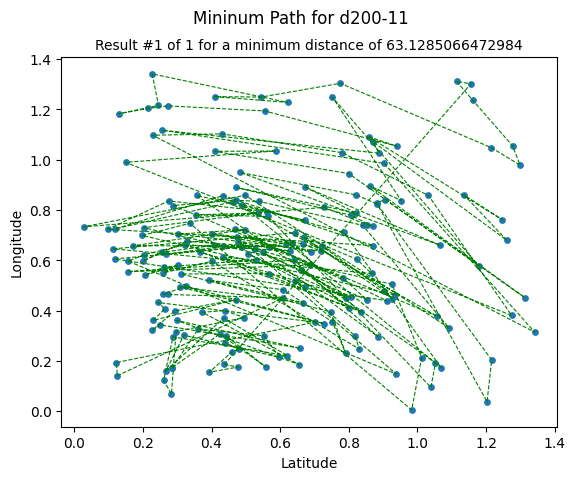

Min Distance Average for the last 1 results is 63.1285066472984

Testing with rho = 0.9 and del_tau = 0.5


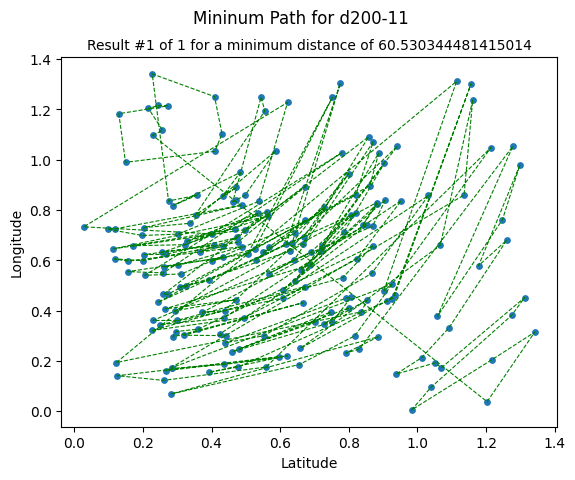

Min Distance Average for the last 1 results is 60.530344481415014

Testing with rho = 0.9 and del_tau = 1.0


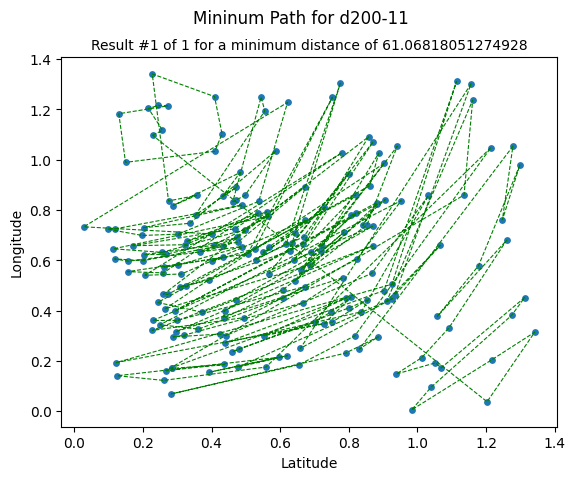

Min Distance Average for the last 1 results is 61.06818051274928

Testing with rho = 0.9 and del_tau = 1.5


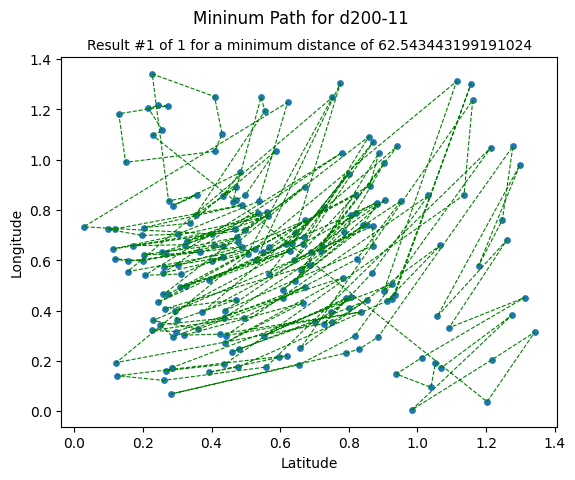

Min Distance Average for the last 1 results is 62.543443199191024

Testing with rho = 0.9 and del_tau = 2.0


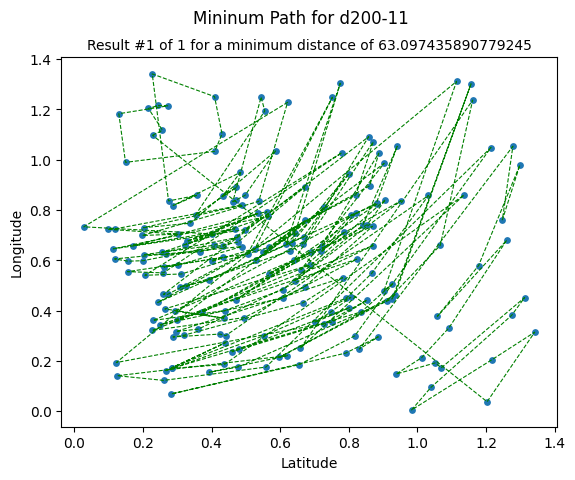

Min Distance Average for the last 1 results is 63.097435890779245

Testing with rho = 0.9 and del_tau = 2.5


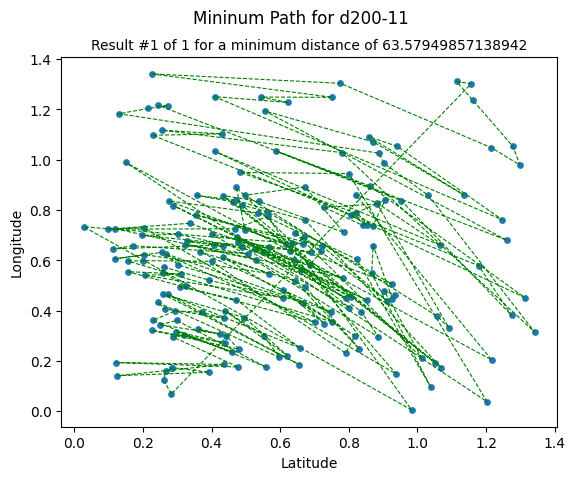

Min Distance Average for the last 1 results is 63.57949857138942



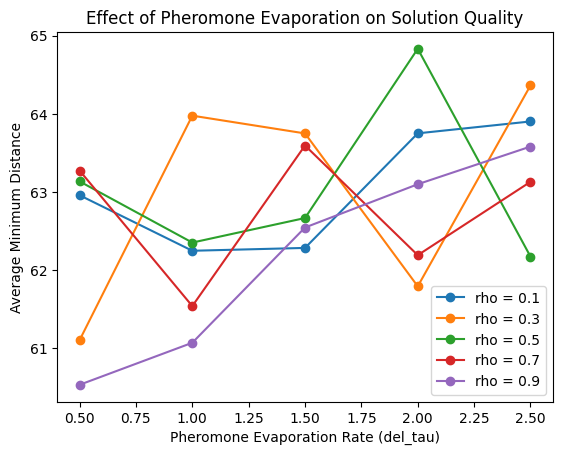

In [16]:
# ACO Parameters
iterations = 10
colony = 25
alpha = 0.6
beta = 1
rho_values = [0.1, 0.3, 0.5, 0.7, 0.9]
del_tau_values = [0.5, 1.0, 1.5, 2.0, 2.5]

# Vars
n = 1         # Run ACO this many times
average_distances = []

for rho in rho_values:
    for del_tau in del_tau_values:
        average = 0 
        print('Testing with rho =', rho, 'and del_tau =', del_tau)
        for i in range(n):
            # Execute ACO
            min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
            average += min_distance

            # Plot solution
            plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
            plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
            plt.suptitle('Mininum Path for {}'.format(TSP['name']))
            plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
            plt.xlabel('Latitude')
            plt.ylabel('Longitude')

            plt.show()
            plt.close()

        average_distances.append(average/n)
        print('Min Distance Average for the last {} results is {}\n'.format(n, average/n))

# Plot results
plt.plot(del_tau_values, average_distances[0:5], marker='o', label='rho = 0.1')
plt.plot(del_tau_values, average_distances[5:10], marker='o', label='rho = 0.3')
plt.plot(del_tau_values, average_distances[10:15], marker='o', label='rho = 0.5')
plt.plot(del_tau_values, average_distances[15:20], marker='o', label='rho = 0.7')
plt.plot(del_tau_values, average_distances[20:25], marker='o', label='rho = 0.9')
plt.title('Effect of Pheromone Evaporation on Solution Quality')
plt.xlabel('Pheromone Evaporation Rate (del_tau)')
plt.ylabel('Average Minimum Distance')
plt.legend()
plt.show()


# Potential best parameters implemented


Name:  d200-11
Type:  TSP
Comment:  200
Dimension:  200
Edge Weight Type:  EUC_2D 



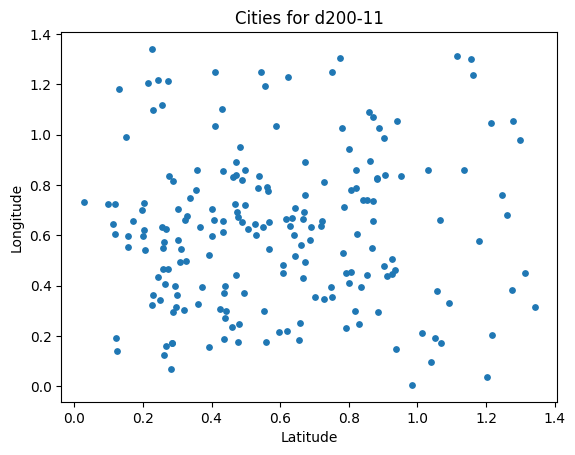

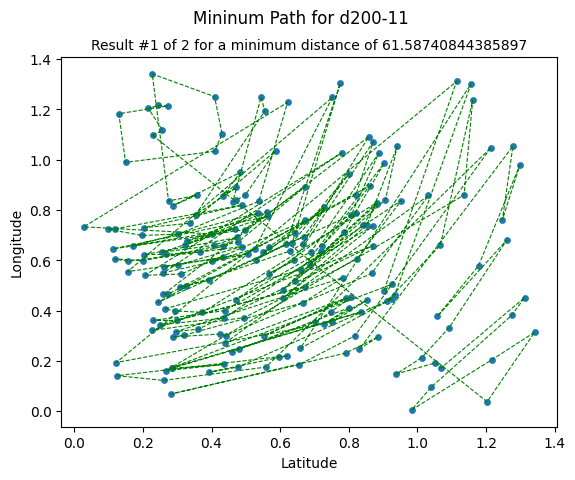

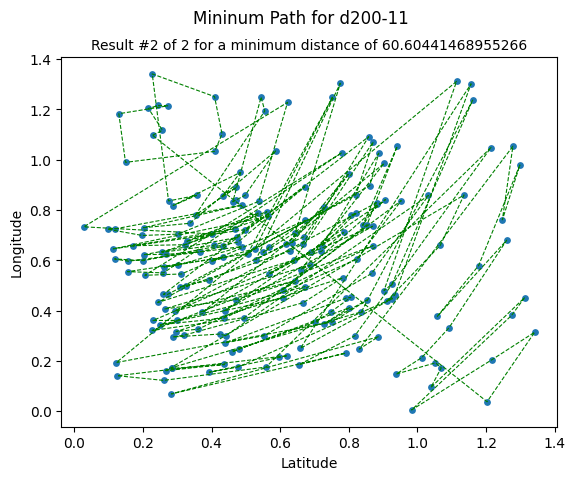

Min Distance Average for the last 2 results is 61.095911566705816


In [17]:
# Read data
TSP = getTspData('d200-11.tsp')
displayTspHeaders(TSP)
cities = np.array(TSP['node_coord_section'])

# Plot
plt.scatter(cities[:, 0], cities[:, 1], s = 15)
plt.title('Cities for {}'.format(TSP['name']))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
plt.close()

# ACO Parameters
iterations = 50
colony = 25
alpha = 0.6 #Potential best value
beta = 1
del_tau = 0.5 #Potential best value
rho = 0.9 #Potential best value

# Vars
n = 2         # Run ACO this many times
average = 0 

# Repeat
for i in range(n):
    # Execute ACO
    min_path, min_distance = runAcoTsp(cities, iterations, colony, alpha, beta, del_tau, rho)
    average += min_distance
    
    # Plot solution
    plt.scatter(cities[:, 0], cities[:, 1], marker='o', s=15)
    plt.plot(cities[min_path, 0], cities[min_path, 1], c='g', linewidth=0.8, linestyle="--")
    plt.suptitle('Mininum Path for {}'.format(TSP['name']))
    plt.title('Result #{} of {} for a minimum distance of {}'.format(i + 1, n, min_distance), fontsize = 10)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
        
    plt.show()
    plt.close()
    
# Show Average over n runs
print('Min Distance Average for the last {} results is {}'.format(n, average/n))


# Conclusion

## Genetic Algorithm Comparison 